# NIRISS Calibration with AMICAL

In this tutorial, we will read in simulated NIRISS AMI data using AMICAL, for a target-calibrator pair, and then visualize the data and extract calibrated observables.

In [1]:
import os
from astropy.io import fits
from matplotlib import pyplot as plt
import amical

In [2]:
plt.close("all")

In [3]:
datadir = "NRM_DATA/"

This example comes with 2 NIRISS simulated dataset representing
a relatively faint binary star (dm = 6) @ 4.3 μm :
-  λ/D: sep = 147.7, theta = 46.6 
-  λ/D: sep = 302.0, theta = 260.9

In [4]:
sep = 147.7  # binary separation [mas]
theta = 46.6  # position angle (pa) [deg]
dm = 6.0  # contrast ratio [mag]

In our simulated data, `_t` is for target (astronomical scene) and `_c` for calibrator (point source)/

We point the path to target and calibrator files, then open these fits files as cubes.

### Reading in data

In [5]:
file_t = os.path.join(
    datadir,
    "t_binary_s={:2.1f}mas_mag=6.0_dm={:2.1f}_posang={:2.1f}__F430M_81_flat_x11__00.fits".format(
        sep, dm, theta
    ),
)
file_c = os.path.join(
    datadir,
    "c_binary_s={:2.1f}mas_mag=6.0_dm={:2.1f}_posang={:2.1f}__F430M_81_flat_x11__00.fits".format(
        sep, dm, theta
    ),
)

In [6]:
hdu = fits.open(file_t)
cube_t = hdu[0].data
hdu.close()

In [7]:
hdu = fits.open(file_c)
cube_c = hdu[0].data
hdu.close()

Additional cleaning steps are required for real NIRISS data
or MIRAGE data (bad pixel, centering, and background).

See example_SPHERE.py for more details.

In [8]:
#  AMI parameters (refer to the docstrings of `extract_bs` for details)
params_ami = {
    "peakmethod": "fft",
    "bs_multi_tri": False,
    "maskname": "g7",
    "fw_splodge": 0.7,
}

### Extracting Observables 

Extract raw complex observables for the target and the calibrator: 
Uses the core of the pipeline `(amical/mf_pipeline/bispect.py)`

This by default produces 
- summary plots of the mask used, 
- the UV plane amplitude,
- - together with real and imaginary parts, amplitude and phase;
- splodges: the mask sampling points should line up with the Fourier power;
- ensembles showing the variation in closure phase and visibility; and
- covariance matrices of visibilities and closure phases.

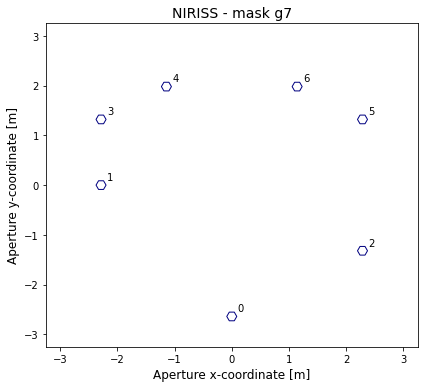

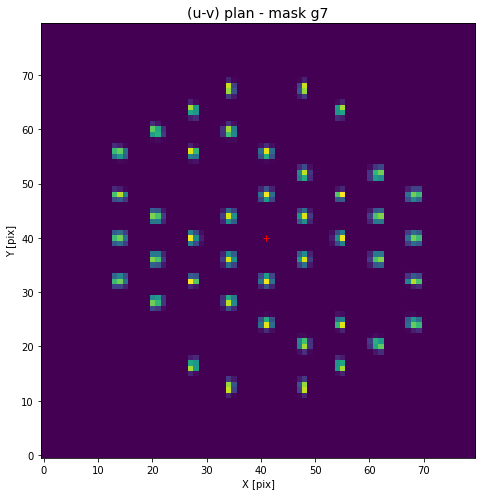

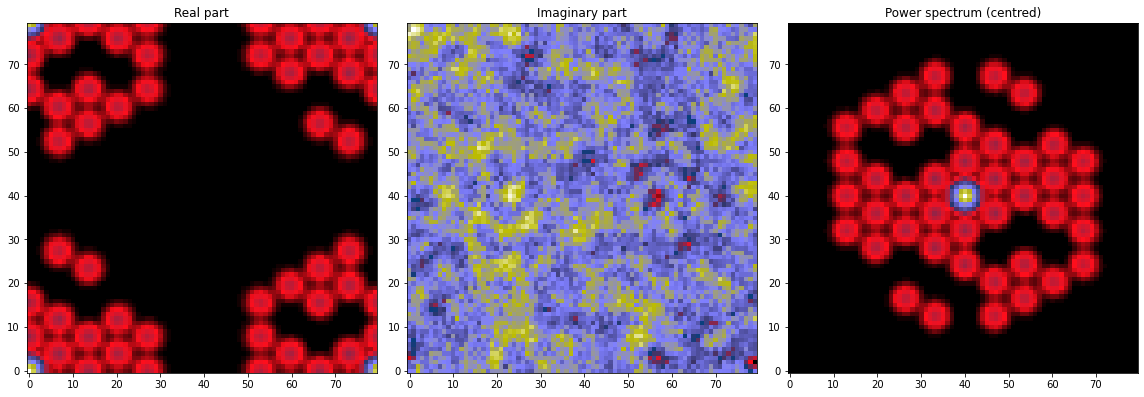

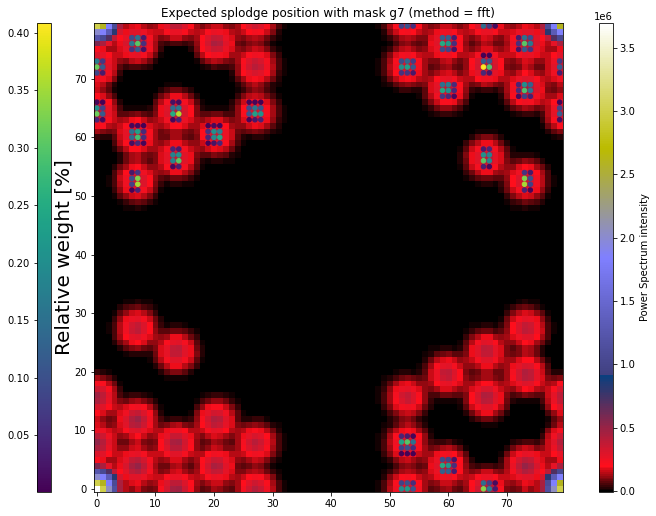

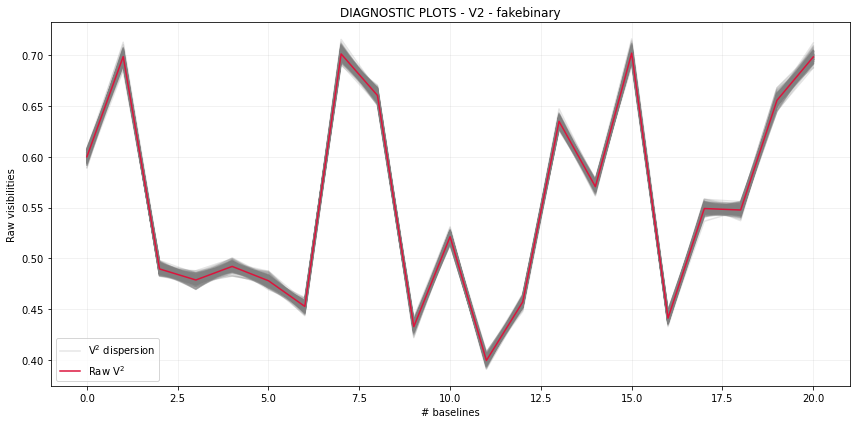

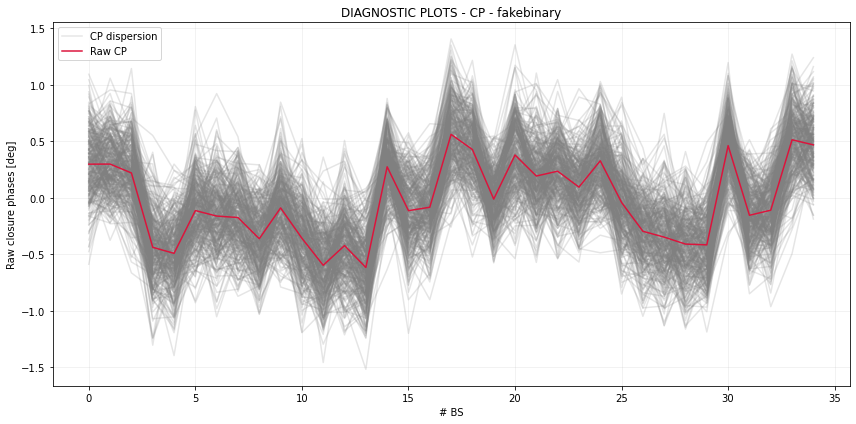

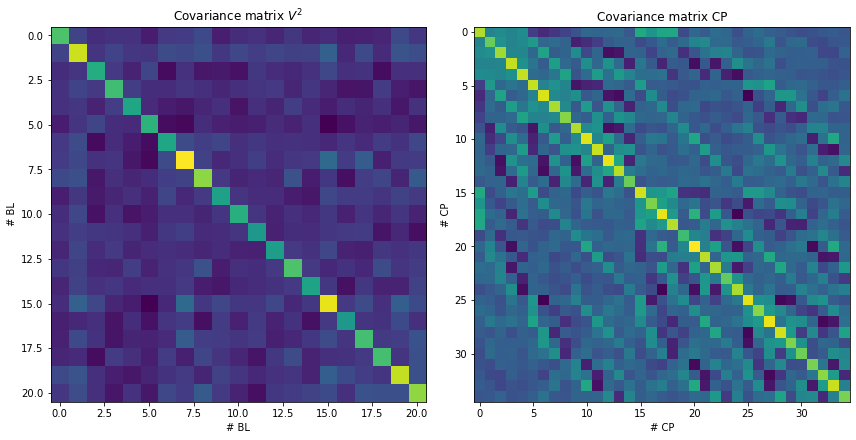

In [9]:
bs_t = amical.extract_bs(
    cube_t, file_t, targetname="fakebinary", **params_ami, display=True
)
bs_c = amical.extract_bs(
    cube_c, file_c, targetname="fakepsf", **params_ami, display=False
)

### Calibration

Now we calibrate the raw data to get calibrated V2 and CP. 

`bs_c` can be a single calibrator result or a list of calibrators.

See `amical/calibration.py` for details.


In [10]:
cal = amical.calibrate(bs_t, bs_c)


 -- SHOW -- Inputs are classes from amical.calibrate:
-> (Check true_flag_v2, true_flag_t3 and snr parameters)



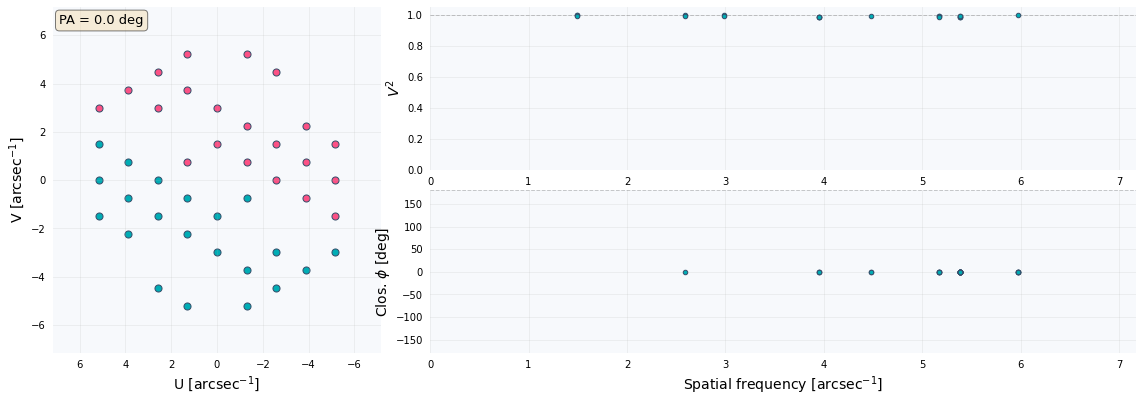

In [11]:
# Display and save the results as oifits
amical.show(cal)
dic = amical.save(cal, oifits_file="example_fakebinary_NIRISS.oifits", fake_obj=True)